In [3]:
import numpy as np
from scipy.optimize import brentq

f = lambda x: x + 1 + (x-3)**-3
brentq(f, -2, -0.5), brentq(f, 0, 2.99)

(-0.984188231211512, 2.3303684533047426)

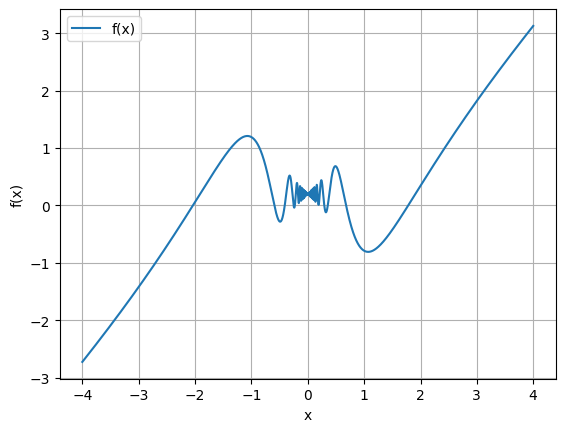

In [14]:
import numpy as np
from scipy.optimize import brentq
import matplotlib.pyplot as plt

point = 4
steps = 5000

f = lambda x: 0.2 + x * np.cos(3 / x)
x, dx = np.linspace(-1 * point, point, steps, retstep=True)

f_values = f(x)
f_values_shifted = np.roll(f_values, 1)
f_values_shifted[0] = f_values[0]

sign_changes = np.where(np.sign(f_values) != np.sign(f_values_shifted))[0]

brent_roots = []
for i in sign_changes:
    a, b = x[i], x[i + 1]
    if f(a) * f(b) < 0:
        root = brentq(f, a, b)
        brent_roots.append(root)

brent_roots = np.array(brent_roots)

plt.plot(x, f_values, label='f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()